## Opening Dataset and Preparing Data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen

#pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

df = pd.read_csv('Wembley2011.csv')
df.head()

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_recipient,pass_shot_assist,pass_switch,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a10ce602-229f-4c8a-8c61-95f8e7438a4a,5,NaN,"[61.0, 41.0]",18236,0,NaN,NaN,2.356194,NaN,NaN,Right Foot,NaN,"[60.0, 42.0]",NaN,Ground Pass,1.414214,NaN,Wayne Mark Rooney,NaN,NaN,Kick Off,1,From Kick Off,Javier Hernández Balcázar,3058.0,Left Center Forward,2,Manchester United,39,['ee82dbf9-b9f5-4eea-84f1-e243d1e97f51'],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,39,00:00:01.213,Pass,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bcce0444-b3f0-45ab-acc7-85b97e846571,8,NaN,"[60.0, 42.0]",18236,0,NaN,NaN,-2.498092,NaN,True,Right Foot,NaN,"[56.0, 39.0]",NaN,Ground Pass,5.000000,NaN,Ryan Giggs,NaN,NaN,NaN,1,From Kick Off,Wayne Mark Rooney,3538.0,Right Center Forward,2,Manchester United,39,['a9141409-33a1-488a-bb7e-6f646bae6f00'],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,39,00:00:01.834,Pass,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.862700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475c9f92-93b2-44c8-9525-fd93b2916a04,12,NaN,"[57.0, 41.0]",18236,0,NaN,NaN,0.915101,NaN,NaN,Left Foot,NaN,"[87.0, 80.0]",NaN,High Pass,49.203660,Out,Luis Antonio Valencia Mosquera,NaN,NaN,NaN,1,From Kick Off,Ryan Giggs,20175.0,Right Defensive Midfield,2,Manchester United,39,['8e225288-00e4-4ecd-8103-4f7885de959e'],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,39,00:00:02.782,Pass,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.031501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3bf37278-f19b-4db0-b93b-fe0792395644,14,NaN,"[35.0, 1.0]",18236,0,NaN,NaN,0.753151,NaN,NaN,NaN,NaN,"[51.0, 16.0]",NaN,Low Pass,21.931713,NaN,Lionel Andrés Messi Cuccittini,NaN,NaN,Throw-in,1,From Throw In,Eric-Sylvain Bilal Abidal,20177.0,Left Back,3,Barcelona,217,['ed068781-2bb5-4c86-a79f-d76ba4bf6444'],18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:18.726,Pass,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2ac7b2a9-a2b4-4d5e-be60-1ddd60e22a90,16,NaN,"[51.0, 16.0]",18236,0,NaN,NaN,1.681454,NaN,NaN,Head,NaN,"[50.0, 25.0]",NaN,Low Pass,9.055386,NaN,Sergio Busquets i Burgos,NaN,NaN,NaN,1,From Throw In,Lionel Andrés Messi Cuccittini,5503.0,Right Wing,3,Barcelona,217,['534eeb98-7e00-4ad3-867e-19f7741b5553'],20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:20.918,Pass,NaN


## Data Cleaning and Manipulation

In [113]:
# Keep record only for Barcelona players
df = df[df['team'] == 'Barcelona']

# record the first time substitution
subs = df[df['type'] == 'Substitution']
subs = subs['minute']
first_sub = subs.min()

# keep the data with records before first substition
df = df[df['minute'] < first_sub].reset_index()

# The data within the coordinates is reported as -> [x, y], we need to create separate variables here, using str.split
# Two variables to look for: location  pass_end_location
# for passer
passer_x = df['location'].str[1:-1].str.split(', ').str[:1].str.join(', ')
passer_y = df['location'].str[1:-1].str.split(', ').str[1:].str.join(', ')
# for receiver
recipient_x = df['pass_end_location'].str[1:-1].str.split(', ').str[:1].str.join(', ')
recipient_y = df['pass_end_location'].str[1:-1].str.split(', ').str[1:].str.join(', ')

# create new variables
df['passer_x'] = passer_x
df['passer_y'] = passer_y
df['recipient_x'] = recipient_x
df['recipient_y'] = recipient_y


df['passer_x'] = df['passer_x'].astype('float')
df['passer_y'] = df['passer_y'].astype('float')
df['recipient_x'] =  df['recipient_x'].astype('float')
df['recipient_y'] = df['recipient_y'].astype('float')


df.head(3)

,level_0,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,off_camera,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_recipient,pass_shot_assist,pass_switch,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,passer_x,passer_y,recipient_x,recipient_y
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.031501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3bf37278-f19b-4db0-b93b-fe0792395644,14,NaN,"[35.0, 1.0]",18236,0,NaN,NaN,0.753151,NaN,NaN,NaN,NaN,"[51.0, 16.0]",NaN,Low Pass,21.931713,NaN,Lionel Andrés Messi Cuccittini,NaN,NaN,Throw-in,1,From Throw In,Eric-Sylvain Bilal Abidal,20177.0,Left Back,3,Barcelona,217,['ed068781-2bb5-4c86-a79f-d76ba4bf6444'],18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:18.726,Pass,NaN,35.0,1.0,51.0,16.0
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2ac7b2a9-a2b4-4d5e-be60-1ddd60e22a90,16,NaN,"[51.0, 16.0]",18236,0,NaN,NaN,1.681454,NaN,NaN,Head,NaN,"[50.0, 25.0]",NaN,Low Pass,9.055386,NaN,Sergio Busquets i Burgos,NaN,NaN,NaN,1,From Throw In,Lionel Andrés Messi Cuccittini,5503.0,Right Wing,3,Barcelona,217,['534eeb98-7e00-4ad3-867e-19f7741b5553'],20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:20.918,Pass,NaN,51.0,16.0,50.0,25.0
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.990693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cd3817c6-0ccd-43da-88ed-233bdc42349a,20,NaN,"[53.0, 28.0]",18236,0,NaN,NaN,1.516795,NaN,NaN,Right Foot,NaN,"[55.0, 65.0]",NaN,Low Pass,37.054016,NaN,Daniel Alves da Silva,NaN,NaN,NaN,1,From Throw In,Sergio Busquets i Burgos,5203.0,Center Defensive Midfield,3,Barcelona,217,['2441fb3b-7909-433a-913f-bfe08b4d1ce0'],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:22.509,Pass,NaN,53.0,28.0,55.0,65.0


In [49]:
df.columns

Index(['level_0', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_length', 'pass_outcome', 'pass_recipient', 'pass_shot_assist',
       'pass_switch', 'pass_type', 'period', 'play_pat

## Average Locations

In [114]:
avg_locations = df.groupby('player').agg({'passer_x':['mean'], 'passer_y':['mean', 'count']})
avg_locations

passer_x   passer_y      
                                      mean       mean count
player                                                     
Andrés Iniesta Luján             71.008850  30.309735   113
Daniel Alves da Silva            61.012195  71.085366    82
David Villa Sánchez              81.066667  57.800000    30
Eric-Sylvain Bilal Abidal        58.049180   9.360656    61
Gerard Piqué Bernabéu            39.148148  32.333333    54
Javier Alejandro Mascherano      41.465517  57.379310    58
Lionel Andrés Messi Cuccittini   78.686275  44.990196   102
Pedro Eliezer Rodríguez Ledesma  85.194444  14.361111    36
Sergio Busquets i Burgos         55.913580  37.728395    81
Víctor Valdés Arribas            11.296296  40.962963    27
Xavier Hernández Creus           68.705479  42.027397   146

In [46]:
'''
# Perform groupby and aggregation, resulting in a DataFrame with MultiIndex columns
avg_locations = df.groupby('player').agg({'passer_x': 'mean', 'passer_y': ['mean', 'count']})

# Flatten MultiIndex column names and join levels with underscore
avg_locations.columns = ['_'.join(col).strip() for col in avg_locations.columns.values]

# Reset the index to convert the 'player' column back to a regular column
avg_locations = avg_locations.reset_index()

# Display the resulting DataFrame with flattened column names
avg_locations
'''

"\n# Perform groupby and aggregation, resulting in a DataFrame with MultiIndex columns\navg_locations = df.groupby('player').agg({'passer_x': 'mean', 'passer_y': ['mean', 'count']})\n\n# Flatten MultiIndex column names and join levels with underscore\navg_locations.columns = ['_'.join(col).strip() for col in avg_locations.columns.values]\n\n# Reset the index to convert the 'player' column back to a regular column\navg_locations = avg_locations.reset_index()\n\n# Display the resulting DataFrame with flattened column names\navg_locations\n"

## Pass Between Players (Count of Associations)

In [115]:
pass_between = df.groupby(['player', 'pass_recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)
pass_between

,player,pass_recipient,pass_count
0,Andrés Iniesta Luján,Daniel Alves da Silva,9
1,Andrés Iniesta Luján,David Villa Sánchez,3
2,Andrés Iniesta Luján,Eric-Sylvain Bilal Abidal,6
3,Andrés Iniesta Luján,Gerard Piqué Bernabéu,4
4,Andrés Iniesta Luján,Javier Alejandro Mascherano,3
...,...,...,...
88,Xavier Hernández Creus,Javier Alejandro Mascherano,13
89,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,24
90,Xavier Hernández Creus,Pedro Eliezer Rodríguez Ledesma,11
91,Xavier Hernández Creus,Sergio Busquets i Burgos,15


## Merging Dataframes

In [116]:
pass_between = pass_between.merge(avg_locations, left_on='player', right_index = True)
pass_between = pass_between.merge(avg_locations, left_on='pass_recipient', right_index=True) #, suffixes= ['', '_end'])
pass_between.columns = ['_'.join(col).strip() for col in pass_between.columns.values]
mapping = {"p_l_a_y_e_r": "passer", "p_a_s_s___r_e_c_i_p_i_e_n_t":"recipient", "p_a_s_s___c_o_u_n_t": "pass_count",
          "(_'_p_a_s_s_e_r___x_'_,_ _'_m_e_a_n_'_)___x":"x", "(_'_p_a_s_s_e_r___y_'_,_ _'_m_e_a_n_'_)___x":"y",
          "(_'_p_a_s_s_e_r___y_'_,_ _'_c_o_u_n_t_'_)___x": "count", "passer_x_mean":"x_end", "passer_y_mean":"y_end", "passer_y_count": "count_end"
          }
pass_between = pass_between.rename(columns=mapping)

pass_between

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_51041/4205825503.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pass_between = pass_between.merge(avg_locations, left_on='player', right_index = True)
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_51041/4205825503.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pass_between = pass_between.merge(avg_locations, left_on='pass_recipient', right_index=True) #, suffixes= ['', '_end'])


,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,Andrés Iniesta Luján,Daniel Alves da Silva,9,71.008850,30.309735,113,61.012195,71.085366,82
17,David Villa Sánchez,Daniel Alves da Silva,6,81.066667,57.800000,30,61.012195,71.085366,82
32,Gerard Piqué Bernabéu,Daniel Alves da Silva,2,39.148148,32.333333,54,61.012195,71.085366,82
42,Javier Alejandro Mascherano,Daniel Alves da Silva,10,41.465517,57.379310,58,61.012195,71.085366,82
51,Lionel Andrés Messi Cuccittini,Daniel Alves da Silva,12,78.686275,44.990196,102,61.012195,71.085366,82
...,...,...,...,...,...,...,...,...,...
83,Xavier Hernández Creus,Andrés Iniesta Luján,30,68.705479,42.027397,146,71.008850,30.309735,113
29,Eric-Sylvain Bilal Abidal,Víctor Valdés Arribas,1,58.049180,9.360656,61,11.296296,40.962963,27
39,Gerard Piqué Bernabéu,Víctor Valdés Arribas,5,39.148148,32.333333,54,11.296296,40.962963,27
48,Javier Alejandro Mascherano,Víctor Valdés Arribas,5,41.465517,57.379310,58,11.296296,40.962963,27


In [145]:
pass_between['passer'].values

array(['Andrés Iniesta Luján', 'David Villa Sánchez',
       'Javier Alejandro Mascherano', 'Lionel Andrés Messi Cuccittini',
       'Sergio Busquets i Burgos', 'Xavier Hernández Creus',
       'Daniel Alves da Silva', 'Javier Alejandro Mascherano',
       'Lionel Andrés Messi Cuccittini', 'Víctor Valdés Arribas',
       'Xavier Hernández Creus', 'Andrés Iniesta Luján',
       'Gerard Piqué Bernabéu', 'Javier Alejandro Mascherano',
       'Pedro Eliezer Rodríguez Ledesma', 'Sergio Busquets i Burgos',
       'Xavier Hernández Creus', 'Andrés Iniesta Luján',
       'Eric-Sylvain Bilal Abidal', 'Javier Alejandro Mascherano',
       'Sergio Busquets i Burgos', 'Xavier Hernández Creus',
       'Daniel Alves da Silva', 'Gerard Piqué Bernabéu',
       'Lionel Andrés Messi Cuccittini', 'Sergio Busquets i Burgos',
       'Víctor Valdés Arribas', 'Xavier Hernández Creus',
       'Andrés Iniesta Luján', 'Daniel Alves da Silva',
       'David Villa Sánchez', 'Eric-Sylvain Bilal Abidal',
       'Ja

In [148]:
# Only include associations with more than 3 passes
pass_between = pass_between[pass_between['pass_count']>3]

# creating new variable for line width
max_line_width = 18
max_marker_size = 3000

pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * max_line_width)

# Map players name
mapping = {'Andrés Iniesta Luján':'Iniesta', 'David Villa Sánchez': 'Villa', 'Javier Alejandro Mascherano': 'Mascherano', 'Lionel Andrés Messi Cuccittini': 'Messi',
           'Sergio Busquets i Burgos':'Busquets', 'Xavier Hernández Creus':'Xavi', 'Daniel Alves da Silva':'Alves', 'Víctor Valdés Arribas':'Valdés',
           'Gerard Piqué Bernabéu': 'Piqué', 'Pedro Eliezer Rodríguez Ledesma': 'Pedro', 'Eric-Sylvain Bilal Abidal':'Abidal'           
          }

pass_between['passer'] = pass_between['passer'].map(mapping).fillna(pass_between['passer'])
pass_between['recipient'] = pass_between['recipient'].map(mapping).fillna(pass_between['recipient'])

## Plotting

In [118]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

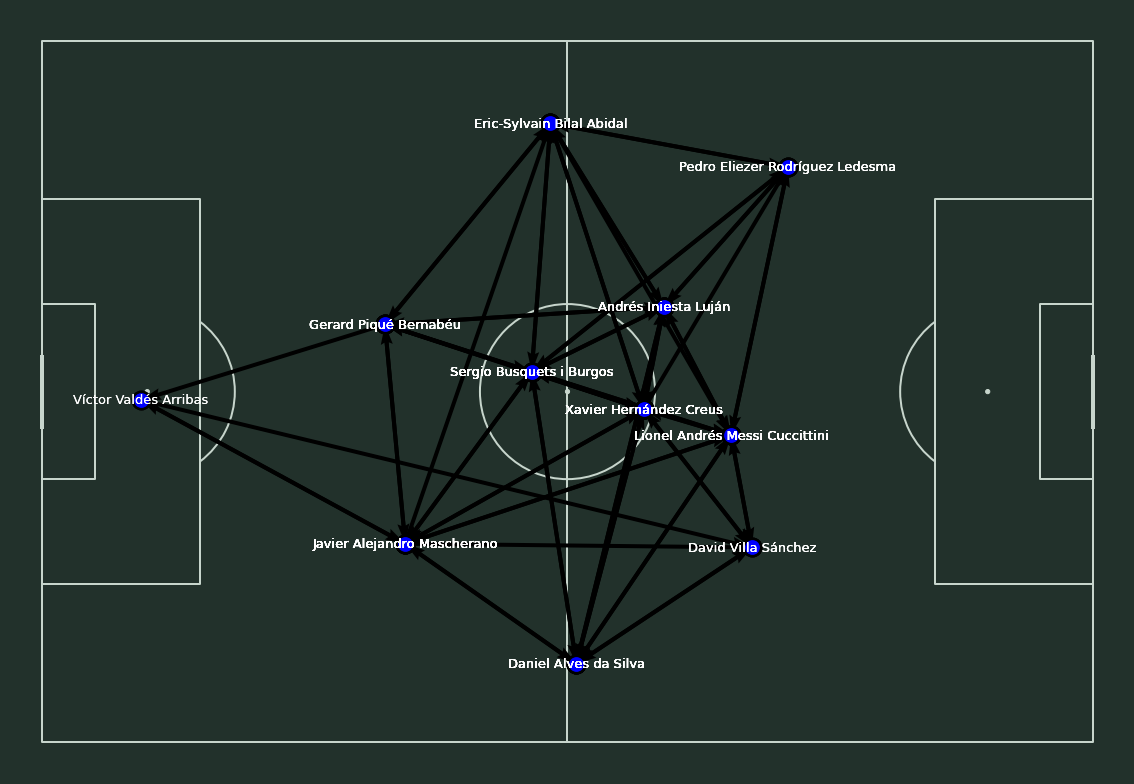

In [119]:
# setting up pithc
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax)

nodes = pitch.scatter(pass_between.x, pass_between.y, s= 300, color = 'blue', edgecolors='black', linewidth = 2.5, alpha = 1, zorder =1, ax=ax)

# labels
for i, txt in enumerate(pass_between['passer']):
    ax.annotate(txt, (pass_between.x.iloc[i], pass_between.y.iloc[i]), color='white', fontsize=13, ha='center', va='center')


## Specialized Pass Network

In [108]:
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager, Sbopen

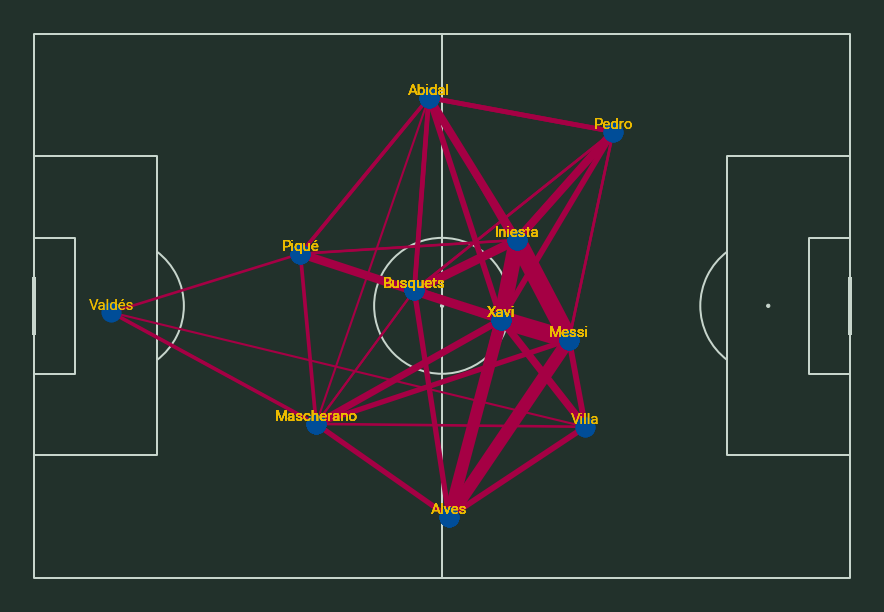

In [170]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")

pass_lines = pitch.lines(pass_between.x, pass_between.y,
                         pass_between.x_end, pass_between.y_end, lw=pass_between.width,
                         color='#a50044', zorder=1, ax=ax)

nodes = pitch.scatter(pass_between.x, pass_between.y, s= 300, color = '#004d98', edgecolors='#004d98', linewidth = 2.5, alpha = 1, zorder =1, ax=ax)

# labels
for i, txt in enumerate(pass_between['passer']):
    ax.annotate(txt, (pass_between.x.iloc[i], pass_between.y.iloc[i]), color='#edbb00', fontproperties = robotto_regular.prop, fontsize=15, ha='center', va='bottom')


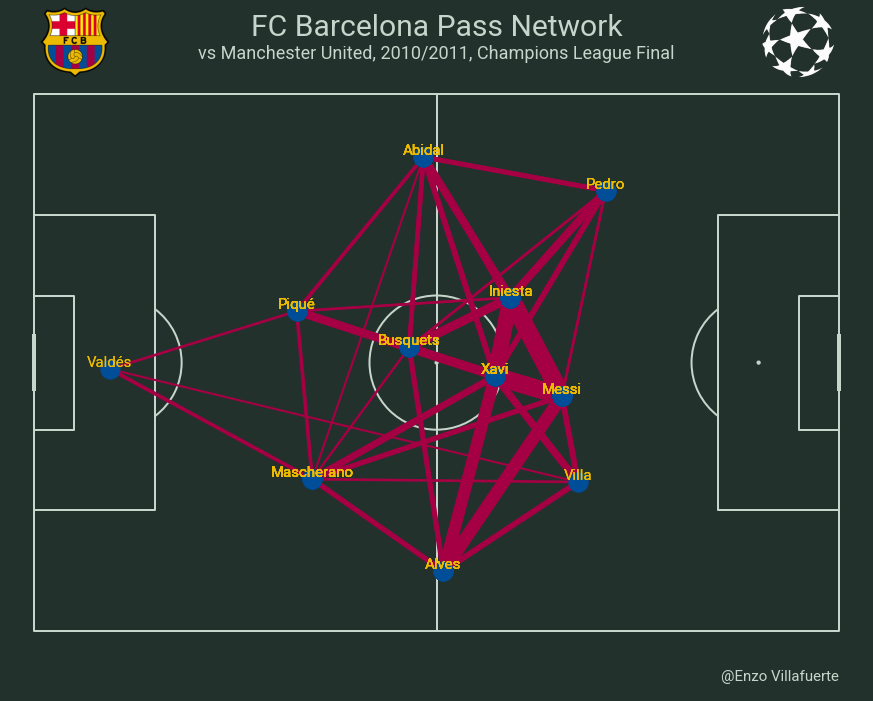

In [213]:
import urllib
from PIL import Image
    
# Load a custom font.
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
robotto_regular = FontManager(URL)

fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("#22312b")

pass_lines = pitch.lines(pass_between.x, pass_between.y,
                         pass_between.x_end, pass_between.y_end, lw=pass_between.width,
                         color='#a50044', zorder=1, ax=axs['pitch'])

nodes = pitch.scatter(pass_between.x, pass_between.y, s= 300, color = '#004d98',
                      edgecolors='#004d98', linewidth = 2.5, alpha = 1, zorder =1, ax=axs['pitch'])

for i, txt in enumerate(pass_between['passer']):
    pitch.annotate(txt, (pass_between.x.iloc[i], pass_between.y.iloc[i]), color='#edbb00', 
                fontproperties = robotto_regular.prop, fontsize=15, ha='center', va='bottom', ax=axs['pitch'])
    
# endnote /title
axs['endnote'].text(1, 0.5, '@Enzo Villafuerte', color='#c7d5cc',
                    va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)

TITLE_TEXT = f'FC Barcelona Pass Network'
OPPONENT = 'vs Manchester United, 2010/2011, Champions League Final'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, OPPONENT, color='#c7d5cc',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)


#load fc barcelona logo
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/8634"
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}.png"))
logo_ax = fig.add_axes([0.05, 0.88, 0.1, 0.1])  # Adjust position and size as needed
logo_ax.set_facecolor("#22312b")

# display the club_icon in the 'logo' axis
logo_ax.imshow(club_icon)
logo_ax.axis('off')

# load champions league logo
fotmob_url_1 = 'https://images.fotmob.com/image_resources/logo/leaguelogo/dark/42.png'
champions_icon = Image.open(urllib.request.urlopen(fotmob_url_1))
logo_ax_1 = fig.add_axes([0.85, 0.88, 0.1, 0.1])  # Adjust position and size as needed
logo_ax_1.set_facecolor("#22312b")
logo_ax_1.imshow(champions_icon)
logo_ax_1.axis('off')

# Save the figure as a PNG or JPG with high resolution
output_filename = 'FCBvsMUTD1011.png'  # Change the file extension for JPG ('output_image.jpg')
fig.savefig(output_filename, dpi=100, bbox_inches='tight', facecolor='#22312b')  # Adjust dpi and bbox_inches as needed

#axs['title'].imshow(club_icon) #, extent=[icon_position[0], icon_position[0] + 0.1, icon_position[1], icon_position[1] + 0.1], zorder=2)